In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sys

sys.path.append('../src/')

from initial_data_clean import *
from grouping_functions import *
from stat_functions import *

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
years = list(us_county_df['year'].unique().astype(int))
years.sort()
years

[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [4]:
gb_agg = GroupBy(us_agg_df)

In [5]:
both_sex, male, female = gb_agg.men_women_both_stats()

In [6]:
both_sex.drop('sex', axis=1, inplace=True)
both_sex

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,deaths,population,age_specific_rate,age_spec_se
3039,2016,44965,323127513,13.915559,0.065624
3040,2015,44193,321418820,13.749350,0.065404
3041,2014,42826,318857056,13.431097,0.064902
3042,2013,41149,316128839,13.016528,0.064168
3043,2012,40600,313914040,12.933477,0.064188
3044,2011,39518,311591917,12.682614,0.063799
3045,2010,38364,308745538,12.425767,0.063440
3046,2009,36909,306771529,12.031429,0.062626
3047,2008,36035,304093966,11.849956,0.062424
3048,2007,34598,301231207,11.485530,0.061748


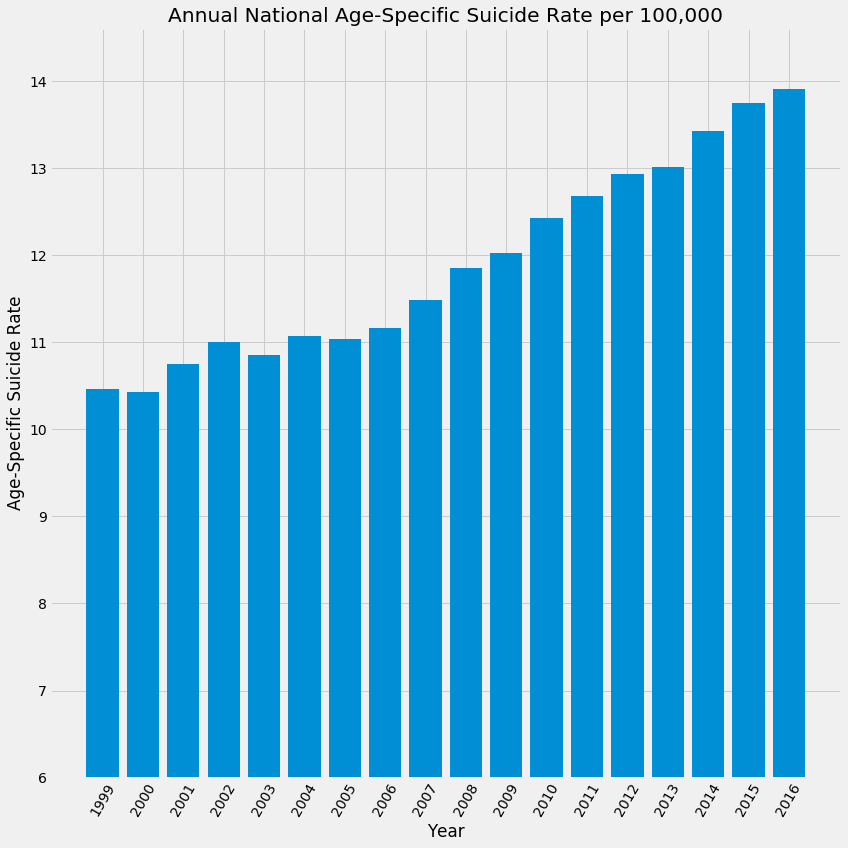

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(both_sex['year'], both_sex['age_specific_rate'])
ax.set_title('Annual National Age-Specific Suicide Rate per 100,000')
ax.set_xlabel('Year')
ax.set_ylabel('Age-Specific Suicide Rate')
plt.ylim(bottom=6)
plt.xticks([i for i in range(1999, 2017)], rotation=60)
plt.tight_layout()
plt.savefig('../images/annual_national_rate.png')
plt.show()

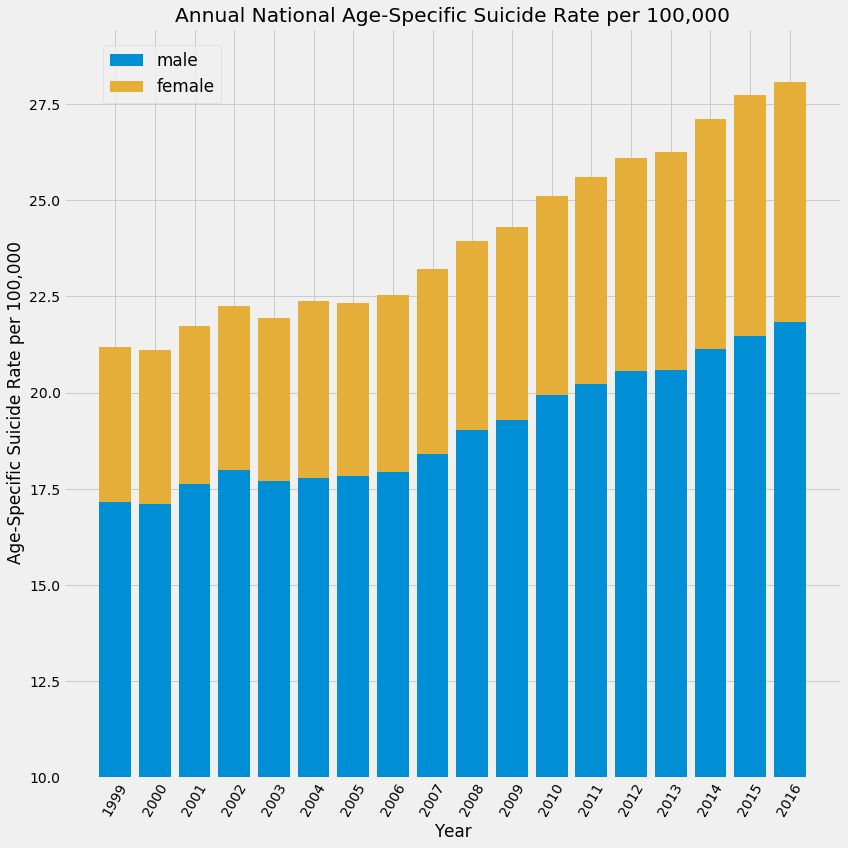

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(male['year'], male['age_specific_rate'], label='male')
ax.bar(female['year'], female['age_specific_rate'], 
       label='female', color='#e5ae38', bottom=male['age_specific_rate'])
ax.set_title('Annual National Age-Specific Suicide Rate per 100,000')
ax.set_xlabel('Year')
ax.set_ylabel('Age-Specific Suicide Rate per 100,000')
ax.legend(loc=(0.05,0.9), prop={'size':'large'})
plt.ylim(bottom=10)
plt.xticks([i for i in range(1999, 2017)], rotation=60)
plt.tight_layout()
plt.savefig('../images/annual_m_f_rate.png')
plt.show()

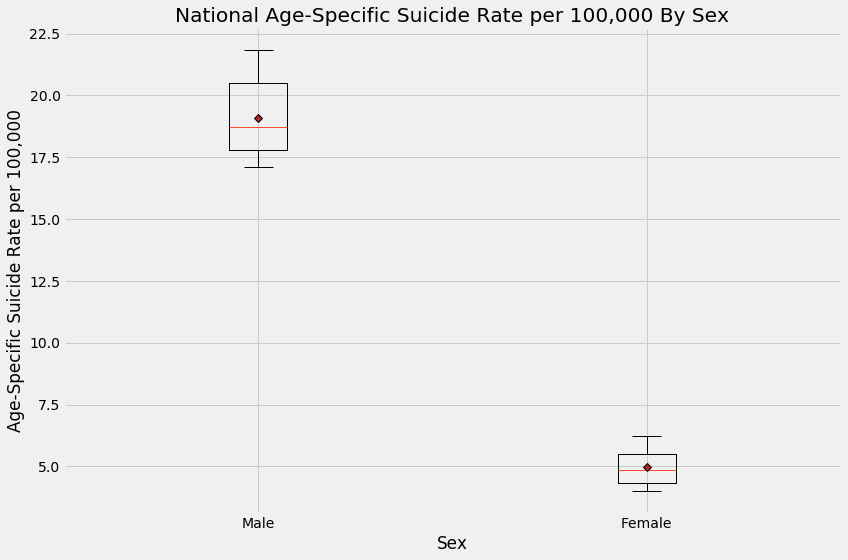

In [9]:
labels = ['Male', 'Female']
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(male_female_box_plot_df(male, female), 
           labels=labels, meanprops=meanpointprops, showmeans=True)
ax.set_title('National Age-Specific Suicide Rate per 100,000 By Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Age-Specific Suicide Rate per 100,000')
plt.tight_layout()
plt.savefig('../images/m_f_rate_box_plot.png')
plt.show()

In [12]:
#T-test m/f
def get_norm_coef(df):
    # This Returns the coef. of Normal dist
    # passing in data frame
    df = df.copy()
    mean_df = df['age_specific_rate'].mean()
    sqrt_df = np.sqrt(len(df['age_specific_rate']))
    std = (df['age_specific_rate'].std())/sqrt_df
    return mean_df, std

def normal_dist(mean, std):
    # This returns Normal dist with desired coefs
    return stats.norm(loc=mean, scale=std)

In [13]:
male_mean, male_std = get_norm_coef(male)
female_mean, female_std = get_norm_coef(female)

In [14]:
male_norm = normal_dist(male_mean, male_std)
female_norm = normal_dist(female_mean, female_std)
t_test = stats.ttest_ind(male['age_specific_rate'], female['age_specific_rate'], equal_var=False)

In [15]:
t_test

Ttest_indResult(statistic=34.51045427047852, pvalue=4.056464310171394e-22)

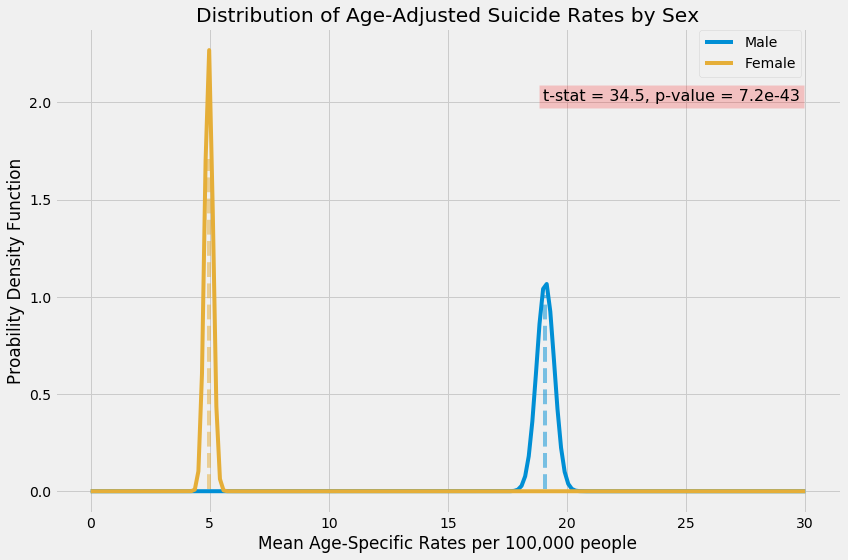

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(0, 30, 200)
ax.plot(x, male_norm.pdf(x), label='Male')
ax.plot(x, female_norm.pdf(x), color = '#e5ae38', label='Female')
ax.set_title('Distribution of Age-Adjusted Suicide Rates by Sex')
ax.set_xlabel('Mean Age-Specific Rates per 100,000 people')
ax.set_ylabel('Proability Density Function')
ax.axvline(male_mean, ymin=0.05, ymax=0.45, ls='--', alpha = 0.5)
ax.axvline(female_mean, 
           ymin=0.05, ymax=0.73, ls='--', alpha = 0.5, color='#e5ae38')
plt.text(x=19,y=2.01,
        s=f't-stat = {t_test[0]:.1f}, p-value = 7.2e-43',
        fontsize=16,
        bbox=dict(facecolor='red', alpha=0.2))
plt.legend(loc=(0.82,0.9))
plt.tight_layout()
plt.savefig('../images/male_female_t_test.png')